In [1]:
#Dependencies
import pandas as pd

In [2]:
# Store filepath in a variable
budget_data = "budget_by_year.csv"
financial_data = "City.Chicago.Financials.csv"

In [3]:
# Read our Data file with the pandas library
budget_by_year_df = pd.read_csv(budget_data, encoding="ISO-8859-1")
yearly_financials = pd.read_csv(financial_data, encoding="ISO-8859-1")

In [4]:
# Cleaning the department description to eliminate descrepancies in department descriptions between years
budget_by_year_df['department_description'].replace('BUS AFFAIRS AND CONSUMER PROT', \
                                                    'BUSINESS AFFAIRS AND CONSUMER PROTECTION', inplace=True)
budget_by_year_df['department_description'].replace('DOIT', \
                                                    'DEPARTMENT OF INNOVATION & TECHNOLOGY', inplace=True)
budget_by_year_df['department_description'].replace('FINANCE', \
                                                    'DEPARTMENT OF FINANCE', inplace=True)
budget_by_year_df['department_description'].replace('IPRA', \
                                                    'INDEPENDENT POLICE REVIEW AUTHORITY', inplace=True)
budget_by_year_df['department_description'].replace(['FLEET AND FACILITY MANAGEMENT', 'FLEET AND FACILITY MGMT'], \
                                                    'DEPARTMENT OF FLEET MANAGEMENT', inplace=True)
budget_by_year_df['department_description'].replace('OEMC', \
                                                    'OFFICE OF EMERGENCY MANAGEMENT & COMMUNICATIONS', inplace=True)
budget_by_year_df['department_description'].replace(['IG', 'OIG'], \
                                                    'INSPECTOR GENERAL', inplace=True)
budget_by_year_df['department_description'].replace('PLANNING AND DEVELOPMENT', \
                                                    'HOUSING AND ECONOMIC DEVELOPMT', inplace=True)
budget_by_year_df['department_description'].replace('ADMINISTRATIVE HEARINGS', \
                                                    'DEPT OF ADMINISTRATIVE HEARING', inplace=True)
budget_by_year_df['department_description'].replace('ANIMAL CARE AND CONTROL', \
                                                    'COMM ANIMAL CARE AND CONTROL', inplace=True)
budget_by_year_df['department_description'].replace('BACP', \
                                                    'BUSINESS AFFAIRS AND CONSUMER PROTECTION', inplace=True)
budget_by_year_df['department_description'].replace('CDOT', \
                                                    'CHICAGO DEPT OF TRANSPORTATION', inplace=True)
budget_by_year_df['department_description'].replace('DCASE', \
                                                    'CULTURAL AFFAIRS SPECIAL EVENT', inplace=True)
budget_by_year_df['department_description'].replace('DEPARTMENT OF BUILDINGS', \
                                                    'DEPT OF BUILDINGS', inplace=True)
budget_by_year_df['department_description'].replace('PROCUREMENT SERVICES', \
                                                    'DEPARTMENT OF PROCUREMENT SERV', inplace=True)
budget_by_year_df['department_description'].replace('STREETS AND SANITATION', \
                                                    'DEPT STREETS AND SANITATION', inplace=True)
budget_by_year_df['department_description'].replace('OBM', \
                                                    'OFFICE OF BUDGET & MANAGEMENT', inplace=True)
budget_by_year_df['department_description'].replace('WATER MANAGEMENT', \
                                                    'DEPT OF WATER MANAGEMENT', inplace=True)
budget_by_year_df['department_description'].replace('MOPD', \
                                                    'MAYORS OFFICE-DISABILITIES', inplace=True)
budget_by_year_df['department_description'].replace('CHICAGO FIRE DEPARTMENT', \
                                                    'FIRE DEPARTMENT', inplace=True)
budget_by_year_df['department_description'].replace('CHICAGO POLICE DEPARTMENT', \
                                                    'DEPARTMENT OF POLICE', inplace=True)

In [5]:
# Pull annual salaried employees into a dataframe
annual_df = budget_by_year_df.loc[budget_by_year_df["budgeted_unit"] == "Annual", :]
annual_df.head()

,year,fund_type,fund_code,fund_description,department_number,department_description,organization_code,division_code,division_description,section_code,section_description,title_code,title_description,budgeted_unit,total_budgeted_unit,budgeted_pay_rate,total_budgeted_amount
0,2011,Local,300,VEHICLE FUND,25.0,CITY CLERK,1005,2005.0,City Clerk,3030.0,Vehicle License Data Services,15,Schedule Salary Adjustments,Annual,0,2485.0,2485.0
1,2011,Local,610,MIDWAY AIRPORT FUND,27.0,DEPARTMENT OF FINANCE,1005,2005.0,City Comptroller,3030.0,Auditing,15,Schedule Salary Adjustments,Annual,0,2389.0,2389.0
2,2011,Local,610,MIDWAY AIRPORT FUND,27.0,DEPARTMENT OF FINANCE,1005,2005.0,City Comptroller,3030.0,Auditing,102,Accountant II,Annual,1,73932.0,73932.0
3,2011,Local,100,CORPORATE FUND,28.0,CITY TREASURER,1005,2005.0,City Treasurer,3015.0,Financial Reporting,104,Accountant IV,Annual,1,76536.0,76536.0
4,2011,Local,100,CORPORATE FUND,28.0,CITY TREASURER,1005,2005.0,City Treasurer,3015.0,Financial Reporting,104,Accountant IV,Annual,1,88140.0,88140.0


In [6]:
# List of years in the data set
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017]

# Empty dataframe to append employee counts to
dep_count = pd.DataFrame()

# loop through the annual salaried employee datafrome by year
for year in years:
    
    # Create a dataframe for a specific year
    aby_df = annual_df.loc[annual_df["year"] == year, :]
    
    # Create a groupby objected based on department
    aby_gp = aby_df.groupby("department_description")
    
    # Sum the number of annual salaried employees per department   
    aby_dep_count = aby_gp["total_budgeted_unit"].sum()
    
    # append to the employee count datafrome
    dep_count.loc[:, f"{year} Dept Annual Employees"] = aby_dep_count

In [7]:
# Pull monthly salaried employees into a dataframe
monthly_df = budget_by_year_df.loc[budget_by_year_df["budgeted_unit"] == "Monthly", :]
monthly_df.head()

,year,fund_type,fund_code,fund_description,department_number,department_description,organization_code,division_code,division_description,section_code,section_description,title_code,title_description,budgeted_unit,total_budgeted_unit,budgeted_pay_rate,total_budgeted_amount
427,2011,Local,300,VEHICLE FUND,25.0,CITY CLERK,1005,2005.0,City Clerk,3025.0,Issuance of Vehicle Licenses,429,Clerk II,Monthly,24,2298.0,55152.0
693,2011,Local,100,CORPORATE FUND,29.0,DEPARTMENT OF REVENUE,1005,2003.0,Department of Revenue,3154.0,Payment Processing,235,Payment Services Representative,Monthly,12,3036.0,36432.0
785,2011,Local,100,CORPORATE FUND,29.0,DEPARTMENT OF REVENUE,1005,2003.0,Department of Revenue,3157.0,Street Operations,7482,Parking Enforcement Aide,Monthly,1272,2944.0,3744768.0
1579,2011,Local,100,CORPORATE FUND,38.0,GENERAL SERVICES,1005,2125.0,Bureau Trades and Engineering Management,3182.0,Building Engineering,7747,Chief Operating Engineer,Monthly,5,8698.0,521872.0
1587,2011,Local,100,CORPORATE FUND,38.0,GENERAL SERVICES,1005,2125.0,Bureau Trades and Engineering Management,3183.0,Trade Services,4526,General Foreman of General Trades,Monthly,2,8713.0,209123.0


In [8]:
# List of departments
depts = dep_count.index

# loop through monthly salaried employee datafrome by year
for year in years:
    
    # Create a dataframe for a specific year
    mby_df = monthly_df.loc[monthly_df["year"] == year, :]
    
    # empty list to hold yearly monthly employee counts for a given year
    mby_list = []
    
    # loop through city departments
    for department in depts:
        
        # Create a dataframe for a specific department
        mby_dept_df = mby_df.loc[mby_df["department_description"] == department, :]
        
        # empty list to hold department employee counts
        mbd_list = []
        
        # loop through the rows for a given department
        for x in range(0, len(mby_dept_df)):
            
            # some of the data given is in 12 months increments per employee which is evident by the following:
            # total_budgeted_unit = 24; budgeted_pay_rate = 2298; total_budgeted_amount = 55152
            # this if statement appends that data
            if mby_dept_df.iloc[x, 14] * (mby_dept_df.iloc[x, 15] + 5) > mby_dept_df.iloc[x, 16]:
                
                mbd_list.append(mby_dept_df.iloc[x, 14]/12)
            
            # some of the data is given as number of employees which is evident by the the following:
            # total_budgeted_unit = 2; budgeted_pay_rate = 8713; total_budgeted_amount = 209123
            # the number of months per year (12) must be manually applied: 2 * 12 * 8713 = 209123
            # this else statement appends that data
            else:
                
                mbd_list.append(mby_dept_df.iloc[x, 14])
                
        # sum the employee numbers appended in the conditional statement above
        mby_list.append(sum(mbd_list))
    
    # Append the yearly monthly salaried employee data to the overall dataframe
    dep_count.loc[:, f"{year} Dept Monthly Employees"] = mby_list

In [9]:
# Pull hourly salaried employees into a dataframe
hourly_df = budget_by_year_df.loc[budget_by_year_df["budgeted_unit"] == "Hourly", :]
hourly_df.head()

,year,fund_type,fund_code,fund_description,department_number,department_description,organization_code,division_code,division_description,section_code,section_description,title_code,title_description,budgeted_unit,total_budgeted_unit,budgeted_pay_rate,total_budgeted_amount
189,2011,Local,100,CORPORATE FUND,5.0,OFFICE OF BUDGET & MANAGEMENT,1005,2005.0,Office of Budget and Management,3035.0,Return to Work,6344,Watchman - TRTW,Hourly,0,19.0,0.0
266,2011,Local,100,CORPORATE FUND,6.0,DEPARTMENT OF INNOVATION & TECHNOLOGY,1005,2005.0,Department of Innovation and Technology,3140.0,Technical Operations,5035,Electrical Mechanic,Hourly,0,40.0,0.0
795,2011,Local,100,CORPORATE FUND,29.0,DEPARTMENT OF REVENUE,1005,2003.0,Department of Revenue,3157.0,Street Operations,7112,Booter - Parking,Hourly,20800,30.0,634400.0
796,2011,Local,100,CORPORATE FUND,29.0,DEPARTMENT OF REVENUE,1005,2003.0,Department of Revenue,3157.0,Street Operations,7112,Booter - Parking,Hourly,30,30.0,1903200.0
797,2011,Local,100,CORPORATE FUND,29.0,DEPARTMENT OF REVENUE,1005,2003.0,Department of Revenue,3157.0,Street Operations,7113,Supervising Booter - Parking,Hourly,5,32.0,328328.0


In [10]:
# loop through hourly salaried employee datafrome by year
for year in years:
    
    # Create a dataframe for a specific year
    hby_df = hourly_df.loc[hourly_df["year"] == year, :]
    
    # empty list to hold yearly hourly employee counts for a given year
    hby_list = []
    
    # loop through city departments
    for department in depts:
        
        # Create a dataframe for a specific department
        hby_dept_df = hby_df.loc[hby_df["department_description"] == department, :]
        
        # empty list to hold department employee counts
        hbd_list = [] 
        
        # loop through the rows for a given department
        for x in range(0, len(hby_dept_df)):
            
            # confirm that the total budget ammount does not equal zero
            if hby_dept_df.iloc[x, 16] != 0:
                
                # some of the data given is in total number of hours per year
                # when this occurs, this statement estimates the number of employees by dividing by 2100 hrs/year and rounding up
                # if total_budgeted_unit * (budgeted_pay_rate + 5 (buffer for rounding)) > total_budgeted_amount
                # note that 2100 hrs/year is assumed to be an approximation of what the departments use
                # based on a calculated sample of the data
                if hby_dept_df.iloc[x, 14] * (hby_dept_df.iloc[x, 15] + 5) > hby_dept_df.iloc[x, 16]:
                    
                    hbd_list.append(int(round(hby_dept_df.iloc[x, 14]/2100)))
                
                # some of the data is given as number of employees
                # this statement appends those values
                else:
                    
                    hbd_list.append(hby_dept_df.iloc[x, 14])
                    
        # sum the employee numbers appended in the conditional statement above
        hby_list.append(sum(hbd_list))
    
    # Append the yearly monthly salaried employee data to the overall dataframe
    dep_count.loc[:, f"{year} Dept Hourly Employees"] = hby_list

In [11]:
# remove null values ("NaN")
for year in years:
    dep_count[f"{year} Dept Annual Employees"].fillna(0, inplace=True)
    
# sum total employees per year and append to dataframe
for year in years:
    dep_count.loc[:, f"{year} Dept Total Employees"] = dep_count[f"{year} Dept Annual Employees"] + \
                                                      dep_count[f"{year} Dept Monthly Employees"] + \
                                                     dep_count[f"{year} Dept Hourly Employees"]

# write the dataframe to a csv
dep_count.to_csv("dep_count.csv", index=True)

# Print the employee count dataframe
dep_count.head()

,2011 Dept Annual Employees,2012 Dept Annual Employees,2013 Dept Annual Employees,2014 Dept Annual Employees,2015 Dept Annual Employees,2016 Dept Annual Employees,2017 Dept Annual Employees,2011 Dept Monthly Employees,2012 Dept Monthly Employees,2013 Dept Monthly Employees,...,2015 Dept Hourly Employees,2016 Dept Hourly Employees,2017 Dept Hourly Employees,2011 Dept Total Employees,2012 Dept Total Employees,2013 Dept Total Employees,2014 Dept Total Employees,2015 Dept Total Employees,2016 Dept Total Employees,2017 Dept Total Employees
department_description,,,,,,,,,,,,,,,,,,,,,
BOARD OF ELECTION COMMISSIONER,124,124.0,119.0,118.0,118.0,118.0,118.0,0.0,0.0,0.0,...,0,0,0,124.0,124.0,119.0,118.0,118.0,118.0,118.0
BOARD OF ETHICS,7,8.0,9.0,9.0,9.0,9.0,8.0,0.0,0.0,0.0,...,0,0,0,7.0,8.0,9.0,9.0,9.0,9.0,8.0
BUSINESS AFFAIRS AND CONSUMER PROTECTION,196,180.0,187.0,186.0,186.0,188.0,189.0,0.0,0.0,0.0,...,5,5,5,203.0,187.0,194.0,191.0,191.0,193.0,194.0
CHICAGO DEPT OF TRANSPORTATION,373,348.0,360.0,361.0,359.0,371.0,376.0,85.0,78.0,78.0,...,844,857,890,979.0,930.0,932.0,1170.0,1296.0,1320.0,1361.0
CHICAGO PUBLIC LIBRARY,931,786.0,771.0,775.0,779.0,794.0,786.0,0.0,0.0,0.0,...,160,157,158,1126.0,831.0,903.0,934.0,939.0,951.0,944.0


In [12]:
# Summarize total employee counts in a dataframe
total_dep_emp = dep_count[["2011 Dept Total Employees", "2012 Dept Total Employees", "2013 Dept Total Employees", \
                          "2014 Dept Total Employees", "2015 Dept Total Employees", "2016 Dept Total Employees", \
                          "2017 Dept Total Employees"]]

total_dep_emp

,2011 Dept Total Employees,2012 Dept Total Employees,2013 Dept Total Employees,2014 Dept Total Employees,2015 Dept Total Employees,2016 Dept Total Employees,2017 Dept Total Employees
department_description,,,,,,,
BOARD OF ELECTION COMMISSIONER,124.000000,124.0,119.0,118.0,118.0,118.0,118.0
BOARD OF ETHICS,7.000000,8.0,9.0,9.0,9.0,9.0,8.0
BUSINESS AFFAIRS AND CONSUMER PROTECTION,203.000000,187.0,194.0,191.0,191.0,193.0,194.0
CHICAGO DEPT OF TRANSPORTATION,979.000000,930.0,932.0,1170.0,1296.0,1320.0,1361.0
CHICAGO PUBLIC LIBRARY,1126.000000,831.0,903.0,934.0,939.0,951.0,944.0
CITY CLERK,108.000000,100.0,98.0,98.0,96.0,96.0,96.0
CITY COUNCIL,234.000000,236.0,236.0,240.0,240.0,239.0,239.0
CITY TREASURER,22.000000,23.0,23.0,24.0,24.0,32.0,31.0
COMM ANIMAL CARE AND CONTROL,83.000000,65.0,81.0,81.0,82.0,82.0,86.0


In [13]:
#empty dataframe to append department budget data to
dep_budgets = pd.DataFrame()

# Loop to add yearly department budgets to the empty dataframe
for year in years:
    
    year_df = budget_by_year_df.loc[budget_by_year_df["year"] == year, :]
    
    year_gp = year_df.groupby("department_description")
    
    year_dep_budget = year_gp["total_budgeted_amount"].sum()
    
    dep_budgets.loc[:, f"{year} Dept Budgets"] = year_dep_budget

In [14]:
# make sure all data is an integer and remove null values ("NaN")
for year in years:
    dep_budgets[f"{year} Dept Budgets"].fillna(0, inplace=True)
    dep_budgets[f"{year} Dept Budgets"] = dep_budgets[f"{year} Dept Budgets"].astype(int)

In [15]:
# print the yearly department budgets
dep_budgets

,2011 Dept Budgets,2012 Dept Budgets,2013 Dept Budgets,2014 Dept Budgets,2015 Dept Budgets,2016 Dept Budgets,2017 Dept Budgets
department_description,,,,,,,
BOARD OF ELECTION COMMISSIONER,7164438,7090200,6975224,6698976,6640056,6675516,6691812
BOARD OF ETHICS,564692,684372,734856,743398,753920,782762,756420
BUSINESS AFFAIRS AND CONSUMER PROTECTION,14289454,13327564,14196494,14021036,14372441,14862470,15133494
CHICAGO DEPT OF TRANSPORTATION,77050619,73640928,75058393,95084744,107712427,112111198,117872199
CHICAGO PUBLIC LIBRARY,61214529,52478537,56264419,56957264,60123787,61919246,62347380
CITY CLERK,6495095,6224565,6196686,6184130,6483725,6548579,6638313
CITY COUNCIL,7779701,7951243,8015890,8286567,8375445,8370000,8397702
CITY TREASURER,1797986,1915707,1945556,2034370,2071902,2735667,2705379
COMM ANIMAL CARE AND CONTROL,4253807,3764004,4107943,4189165,4406031,4507966,4707068


In [16]:
dep_salaries = pd.DataFrame()

for year in years:
    
    dep_salaries.loc[:, f"{year} Dept Avg Salary"] = round(dep_budgets[f"{year} Dept Budgets"]/total_dep_emp[f"{year} Dept Total Employees"],2)
    

In [17]:
dep_salaries

,2011 Dept Avg Salary,2012 Dept Avg Salary,2013 Dept Avg Salary,2014 Dept Avg Salary,2015 Dept Avg Salary,2016 Dept Avg Salary,2017 Dept Avg Salary
department_description,,,,,,,
BOARD OF ELECTION COMMISSIONER,57777.73,57179.03,58615.33,56770.98,56271.66,56572.17,56710.27
BOARD OF ETHICS,80670.29,85546.50,81650.67,82599.78,83768.89,86973.56,94552.50
BUSINESS AFFAIRS AND CONSUMER PROTECTION,70391.40,71270.40,73177.80,73408.57,75248.38,77007.62,78007.70
CHICAGO DEPT OF TRANSPORTATION,78703.39,79183.79,80534.76,81269.01,83111.44,84932.73,86607.05
CHICAGO PUBLIC LIBRARY,54364.59,63151.07,62308.33,60982.08,64029.59,65109.62,66045.95
CITY CLERK,60139.77,62245.65,63231.49,63103.37,67538.80,68214.36,69149.09
CITY COUNCIL,33246.59,33691.71,33965.64,34527.36,34897.69,35020.92,35136.83
CITY TREASURER,81726.64,83291.61,84589.39,84765.42,86329.25,85489.59,87270.29
COMM ANIMAL CARE AND CONTROL,51250.69,57907.75,50715.35,51718.09,53732.09,54975.20,54733.35


In [18]:
fin_years = [2011, 2012, 2013, 2014, 2015, 2016]

tot_budgets = []
labels = []

# create a dataframe showing the yearly total city budgets from 2011 to 2016
for year in fin_years:
    budget_total = dep_budgets[f"{year} Dept Budgets"].sum()
    tot_budgets.append(budget_total)
    labels.append(f"{year}")
    
total_budgets = pd.DataFrame({"Year": labels,
                            "City Budget": tot_budgets})

#Add yearly city financial data to the dataframe
total_budgets["Total Assets"] = yearly_financials["Total Assets"]
total_budgets["Total Liabilities"] = yearly_financials["Total Liabilities"]
total_budgets["Interest Debt"] = yearly_financials["Interest Debt"]
total_budgets["Property Tax Revenue"] = yearly_financials["Property Tax Revenue"]
total_budgets["Total Expenses"] = yearly_financials["Total Expenses"]
total_budgets["Total Revenue"] = yearly_financials["Total Revenue"]
total_budgets["Net Position"] = yearly_financials["Net Position"]
total_budgets[["Year", "City Budget", "Total Assets", "Total Liabilities", "Interest Debt", "Property Tax Revenue", \
              "Total Expenses", "Total Revenue", "Net Position"]]

,Year,City Budget,Total Assets,Total Liabilities,Interest Debt,Property Tax Revenue,Total Expenses,Total Revenue,Net Position
0,2011,2664496474,30477700000,29747300000,474600000,934800000,8582400000,7543300000,-2609900000
1,2012,2567845412,30980900000,31963700000,459900000,893300000,8838600000,7590800000,-4283300000
2,2013,2609932815,30744900000,33395300000,477900000,906700000,8912500000,7824700000,-5371100000
3,2014,2645370284,32694700000,36009500000,580700000,926800000,9319300000,8154100000,-6536300000
4,2015,2783845781,42128100000,62562600000,861300000,1179400000,14364800000,8947100000,-23831400000
5,2016,2852220338,41294400000,64703700000,495800000,1264500000,13003600000,9405100000,-27429900000


In [19]:
budget_changes = []

departments = dep_budgets.index

# Calculate department budget changes between 2011 and 2017
for x in range(0, len(dep_budgets)):
    diff = dep_budgets.iloc[x, 6] - dep_budgets.iloc[x, 0]
    budget_changes.append(diff)
    
diff_budgets = pd.DataFrame({"Departments": departments,
                            "Budget Changes": budget_changes})  

In [20]:
diff_budgets[["Departments", "Budget Changes"]]

diff_budgets_sorted = diff_budgets.sort_values('Budget Changes', ascending=False)

diff_budgets_sorted.reset_index(inplace=True)
diff_budgets_sorted[["Departments", "Budget Changes"]]

,Departments,Budget Changes
0,FIRE DEPARTMENT,92001415
1,DEPARTMENT OF POLICE,58797509
2,DEPARTMENT OF FLEET MANAGEMENT,42199075
3,CHICAGO DEPT OF TRANSPORTATION,40821580
4,DEPARTMENT OF AVIATION,34199048
5,DEPARTMENT OF FINANCE,30636044
6,DEPT OF WATER MANAGEMENT,23639248
7,OFFICE OF EMERGENCY MANAGEMENT & COMMUNICATIONS,23501661
8,DEPARTMENT OF INNOVATION & TECHNOLOGY,3345026
9,DEPT OF BUILDINGS,3229385


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5,1,'City of Chicago Financial Summary (2011 to 2017)')

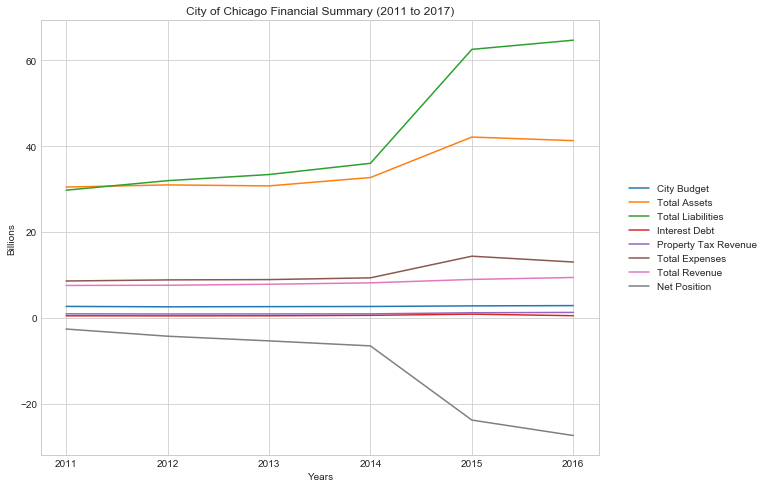

In [25]:
plt.figure(figsize=(10,8))

plt.plot(total_budgets["Year"], total_budgets["City Budget"]/1000000000)
plt.plot(total_budgets["Year"], total_budgets["Total Assets"]/1000000000)
plt.plot(total_budgets["Year"], total_budgets["Total Liabilities"]/1000000000)
plt.plot(total_budgets["Year"], total_budgets["Interest Debt"]/1000000000)
plt.plot(total_budgets["Year"], total_budgets["Property Tax Revenue"]/1000000000)
plt.plot(total_budgets["Year"], total_budgets["Total Expenses"]/1000000000)
plt.plot(total_budgets["Year"], total_budgets["Total Revenue"]/1000000000)
plt.plot(total_budgets["Year"], total_budgets["Net Position"]/1000000000)

sns.set_style("whitegrid")
plt.legend(loc="right", bbox_to_anchor=(1.3, 0.5))
plt.ylabel("Billions")
plt.xlabel("Years")
plt.title("City of Chicago Financial Summary (2011 to 2017)")


Text(0.5,1,'City of Chicago Total Employees (2011 to 2017)')

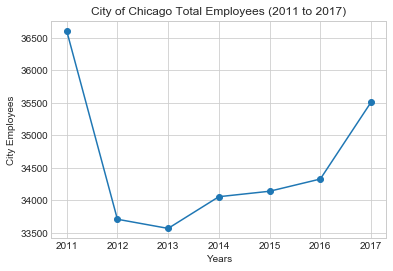

In [23]:
city_employees = []

for year in years:

    city_employees.append(dep_count[f"{year} Dept Total Employees"].sum())
    
plt.plot(years, city_employees, marker='o')

plt.ylabel("City Employees")
plt.xlabel("Years")
plt.title("City of Chicago Total Employees (2011 to 2017)")

[Text(0.5,1,'2017 Dept Budget vs Dept Employees')]

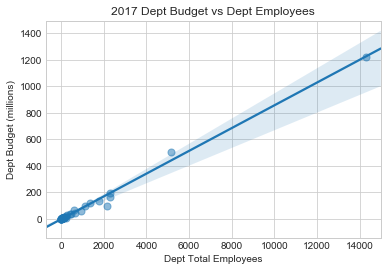

In [24]:
#plot Temperature (F) vs. Latitude using seaborn library
fig1, ax1 = plt.subplots()

ax1 = sns.regplot(x=total_dep_emp["2017 Dept Total Employees"], y=dep_budgets["2017 Dept Budgets"]/1000000, fit_reg=True, \
                  scatter_kws={"s": 50,"alpha":.5})

ax1.set(ylabel="Dept Budget (millions)")
ax1.set(xlabel="Dept Total Employees")
ax1.set(title="2017 Dept Budget vs Dept Employees")